In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data
from sklearn.cluster import KMeans

np.random.seed(4)

# 1. Clustering with the Iris Dataset
a. Choose features other than the ones used in the lesson.<br>
b. Visualize the results of your clustering.<br>
c. Use the elbow method to visually select a good value for `k`.<br>
d. Repeat the clustering, this time with 3 different features.<br>

In [2]:
# bringing in iris data
from pydataset import data

iris = data('iris')

# cleaning up column names
iris.columns = iris.columns.str.lower().str.replace('.', '_')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# selecting features for X
X = iris[['sepal_length', 'petal_width']]
X.head()


,sepal_length,petal_width
1,5.1,0.2
2,4.9,0.2
3,4.7,0.2
4,4.6,0.2
5,5.0,0.2


In [4]:
# scaling X for modeling
from sklearn.preprocessing import StandardScaler

# scaler object
scaler = StandardScaler().fit(X)

# creating scaled df
pd.DataFrame(scaler.transform(X))

# adding column names
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled.head()

,sepal_length,petal_width
0,-0.900681,-1.315444
1,-1.143017,-1.315444
2,-1.385353,-1.315444
3,-1.506521,-1.315444
4,-1.021849,-1.315444


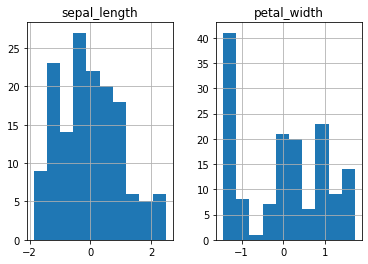

In [5]:
# looking at feature distributions
X_scaled.hist();

NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

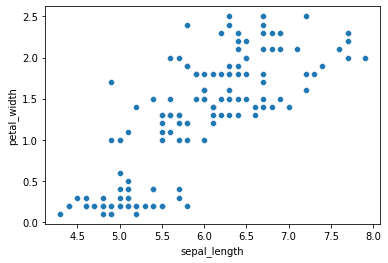

In [6]:
# visualizing features df with scatterplot
sns.scatterplot(data = X, x = 'sepal_length', y = 'petal_width')

In [7]:
# # for loop to add predictions columns for k clusters = 3 - 14

# for n in range(3, 15):
#     # creating model object
#     kmeans = KMeans(n_clusters = n)
    
#     # fitting data to model 
#     kmeans.fit(X)
    
#     # using the. model to make predictions
#     kmeans.predict(X)
    
#     # adding predictions columns to original df
#     iris[f'{n}_clusters'] = kmeans.predict(X)
    

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [9]:
def cluster_predictions(df, X, min_range, max_range):
    '''
THIS FUNCTION TAKES IN A FULL DF, A DF OF FEATURES TO MODEL, A MIN K VALUE, AND MAX K VALUE, AND RETURNS 
A DF WITH K MEANS MODEL PREDICTIONS COLUMNS FOR THE K VALUE RANGE FROM MIN TO MAX - 1. 
    '''
    
    for n in range(min_range, max_range):
        # creating model object
        kmeans = KMeans(n_clusters = n)

        # fitting data to model 
        kmeans.fit(X)

        # using the. model to make predictions
        kmeans.predict(X)

        # adding predictions columns to original df and recasting dtype to object for visualizations
        df[f'{n}_clusters'] = kmeans.predict(X).astype('object')

    return df
    

In [10]:
iris_function = cluster_predictions(iris, X, 1, 7)

In [11]:
iris_function

,sepal_length,sepal_width,petal_length,petal_width,species,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters
1,5.1,3.5,1.4,0.2,setosa,0,1,1,0,1,4
2,4.9,3.0,1.4,0.2,setosa,0,1,1,0,1,1
3,4.7,3.2,1.3,0.2,setosa,0,1,1,0,1,1
4,4.6,3.1,1.5,0.2,setosa,0,1,1,0,1,1
5,5.0,3.6,1.4,0.2,setosa,0,1,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica,0,0,2,1,2,0
147,6.3,2.5,5.0,1.9,virginica,0,0,2,2,0,5
148,6.5,3.0,5.2,2.0,virginica,0,0,2,2,2,0
149,6.2,3.4,5.4,2.3,virginica,0,0,2,2,2,0


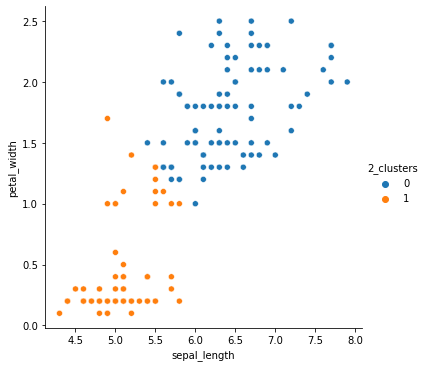

In [12]:
# visualize results of clustering
sns.relplot(data = iris, x = 'sepal_length', y = 'petal_width', hue = '2_clusters')

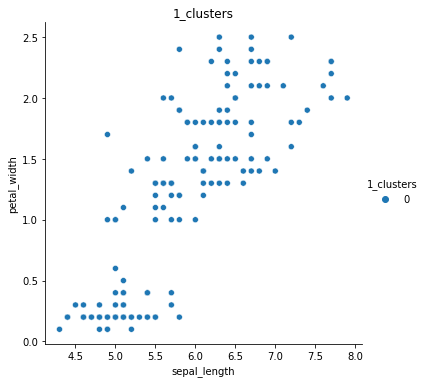

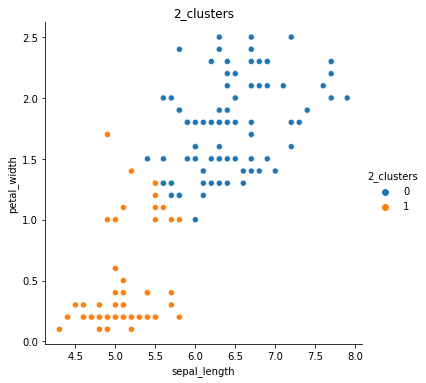

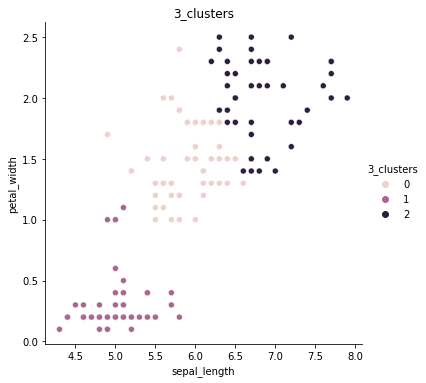

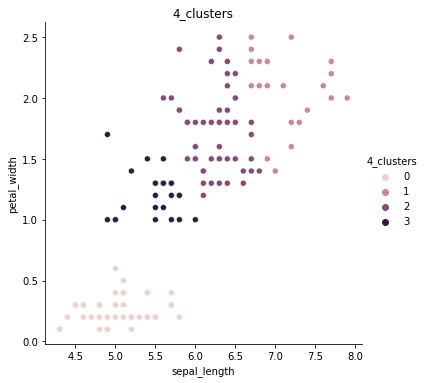

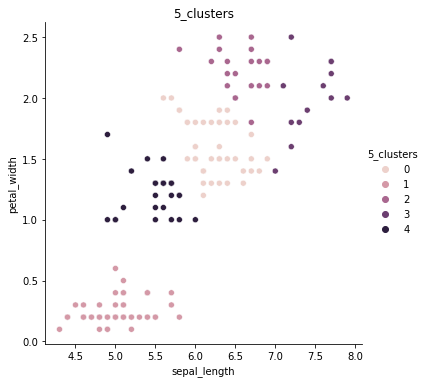

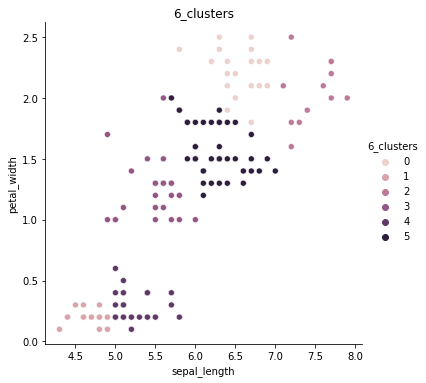

In [13]:
# visualize results of clustering
cluster_cols = ['1_clusters', '2_clusters', '3_clusters', '4_clusters', '5_clusters', '6_clusters']

for col in cluster_cols:
    sns.relplot(data = iris, x = 'sepal_length', y = 'petal_width', hue = col)
    plt.title(f'{col}')
    plt.show()
    print()

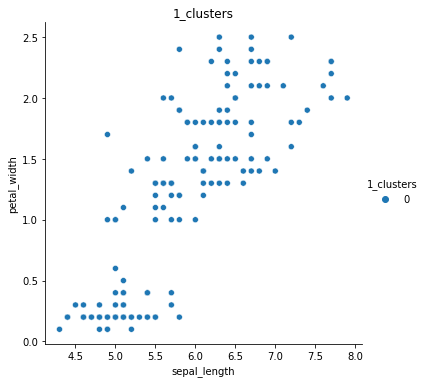

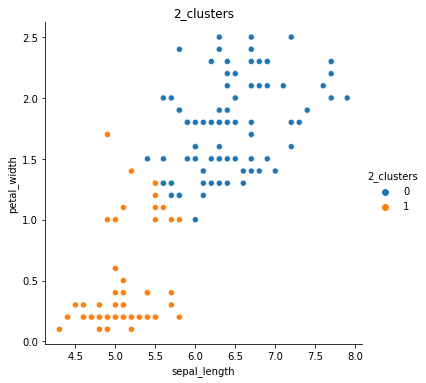

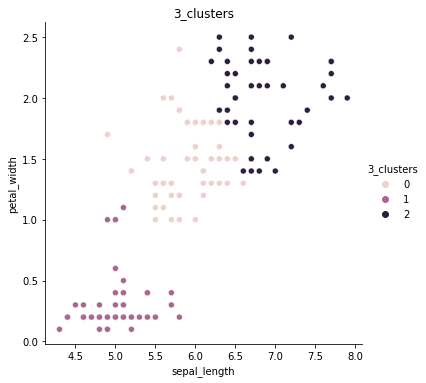

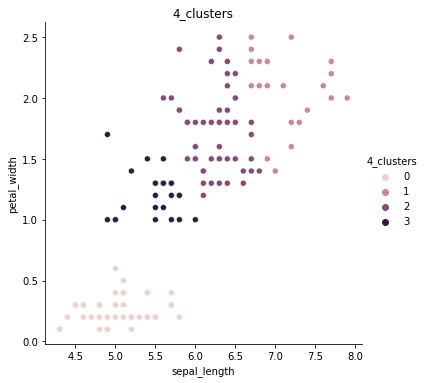

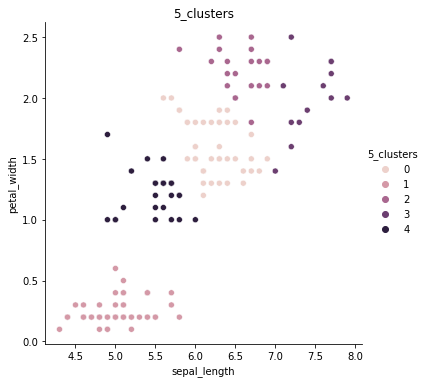

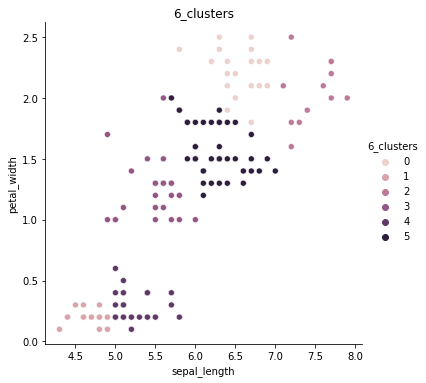

In [14]:
# visualize results of clustering
cluster_cols = ['1_clusters', '2_clusters', '3_clusters', '4_clusters', '5_clusters', '6_clusters']

for col in cluster_cols:
    sns.relplot(data = iris_function, x = 'sepal_length', y = 'petal_width', hue = col)
    plt.title(f'{col}')
    plt.show()
    print()

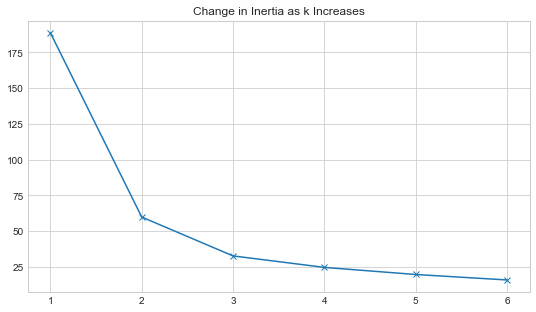

In [15]:
# visualizing inertia using the elbow method
with plt.style.context('seaborn-whitegrid'):
    
    plt.figure(figsize = (9, 5))
    
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(1, 7)}).plot(marker = 'x')
    
    plt.xticks(range(1, 7))
    
    plt.title('Change in Inertia as k Increases')
    
    plt.show()

In [16]:
def plot_inertia(X, min_k_range, max_k_range):
    '''
THIS FUNCTION TAKES IN X (A DF OF MODEL FEATURES), A MIN VALUE FOR THE K RANGE AND A MAX VALUE - 1 FOR THE
K RANGE AND CREATES A LINE PLOT WITH THE INERTIA (ON THE Y AXIS) PLOTTED AGAINST EACH K VALUE (ON THE X AXIS).
    '''
    
    with plt.style.context('seaborn-whitegrid'):
        
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(min_k_range, max_k_range)}).plot(marker = 'x')
        
        plt.xticks(range(min_k_range, max_k_range))
        
        plt.title('Change in Inertia as k Increases')
        
        plt.show()

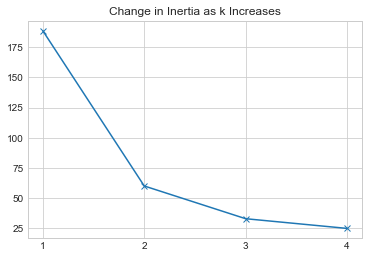

In [17]:
# using the plot inertia function
plot_inertia(X, 1, 5)

In [18]:
# trying clustering with 3 different features
X_three = iris[['petal_length', 'sepal_length', 'sepal_width']]
X_three.head()

,petal_length,sepal_length,sepal_width
1,1.4,5.1,3.5
2,1.4,4.9,3.0
3,1.3,4.7,3.2
4,1.5,4.6,3.1
5,1.4,5.0,3.6


In [19]:
# scaling X - three features df

# scaler object
scaler = StandardScaler().fit(X_three)

# creating scaled df
pd.DataFrame(scaler.transform(X_three))

# adding column names
X_three_scaled = pd.DataFrame(scaler.transform(X_three), columns = X_three.columns)
X_three_scaled.head()


,petal_length,sepal_length,sepal_width
0,-1.340227,-0.900681,1.019004
1,-1.340227,-1.143017,-0.131979
2,-1.397064,-1.385353,0.328414
3,-1.283389,-1.506521,0.098217
4,-1.340227,-1.021849,1.249201


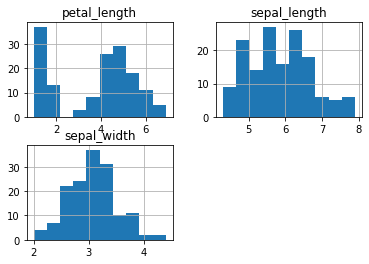

In [20]:
X_three.hist();

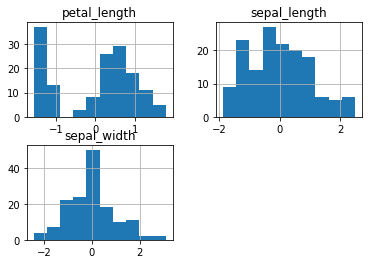

In [21]:
X_three_scaled.hist();

In [33]:
iris_three = cluster_predictions(data('iris'), X_three, 2, 11)
iris_three.columns = iris_three.columns.str.lower().str.replace('.', '_')
iris_three.head()

,sepal_length,sepal_width,petal_length,petal_width,species,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters
1,5.1,3.5,1.4,0.2,setosa,1,1,0,1,0,1,1,1,6
2,4.9,3.0,1.4,0.2,setosa,1,1,0,1,5,6,7,7,0
3,4.7,3.2,1.3,0.2,setosa,1,1,0,1,5,6,7,7,0
4,4.6,3.1,1.5,0.2,setosa,1,1,0,1,5,6,7,7,0
5,5.0,3.6,1.4,0.2,setosa,1,1,0,1,0,1,1,1,6


In [28]:
X_three.columns

Index(['petal_length', 'sepal_length', 'sepal_width'], dtype='object')

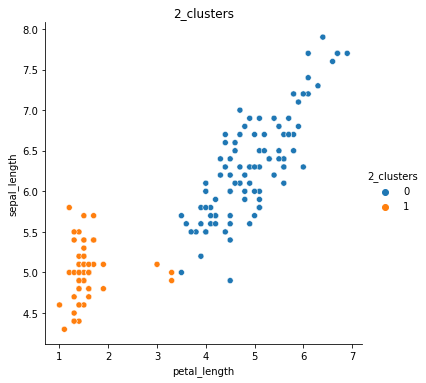

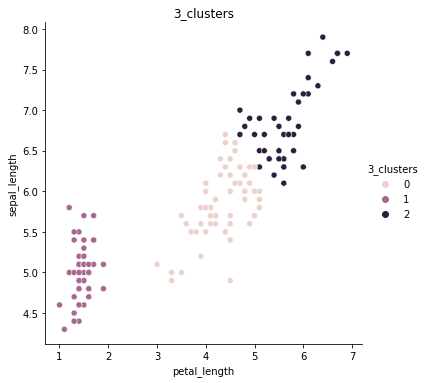

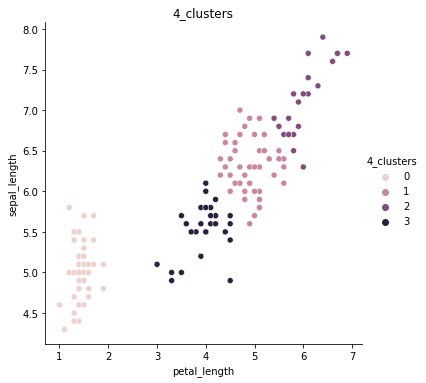

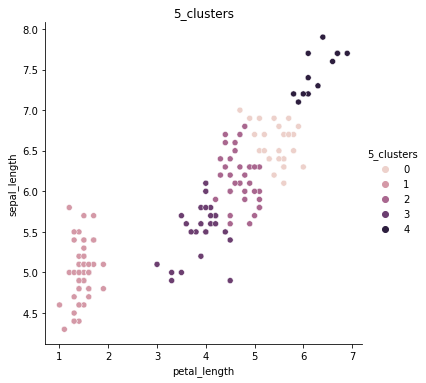

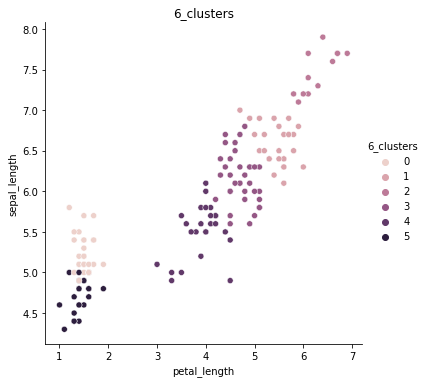

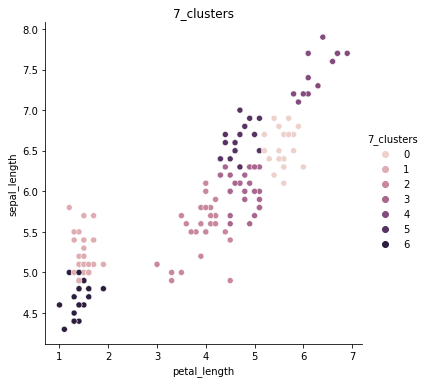

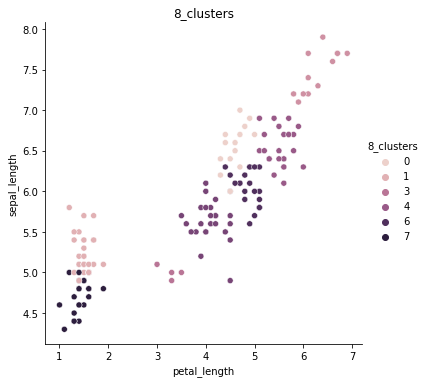

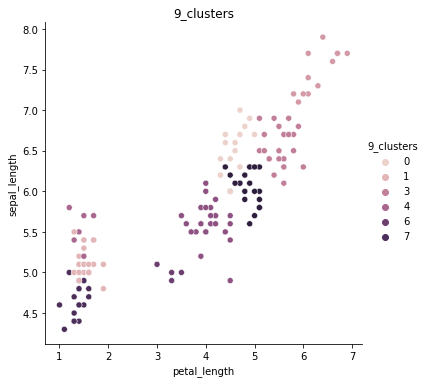

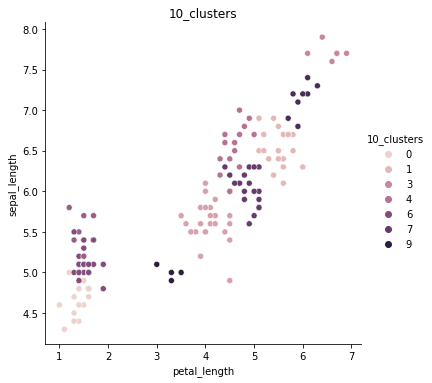

In [34]:
# visualize results of clustering
cluster_cols = ['2_clusters', '3_clusters', '4_clusters', '5_clusters', '6_clusters', '7_clusters', \
                '8_clusters', '9_clusters', '10_clusters', ]

for col in cluster_cols:
    sns.relplot(data = iris_three, x = 'petal_length', y = 'sepal_length', hue = col)
    plt.title(f'{col}')
    plt.show()
    print()

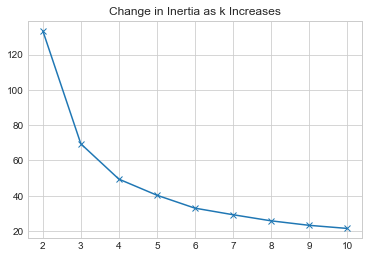

In [35]:
plot_inertia(X_three, 2, 11)

# 2. Mall Data Clustering
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [38]:
import wrangle

mall, train, validate, test = wrangle.wrangle_mall_df()

In [39]:
train.shape, validate.shap

,customer_id,age,annual_income,spending_score,is_male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
193,194,38,113,91,0
194,195,47,120,16,0
195,196,35,120,79,0
196,197,45,126,28,0


# 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

# Bonus
a) Read in the data from this **[google sheet](https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing)** <br>
b) Visualize the data and guess the number and shape of the clusters.<br>
c) Implement the KMeans algorithm on unscaled data and visualize the clusters.<br>
d) Repeat the step above but with scaled data.<br>
c) Write down the takeaways from this exercise.